# Mnist手写字体图像分类 Mnist Handwritten Digit Image Classification

## 背景 Background

下面向大家介绍经典的手写字体识别数据集—Mnist数据集，如图所示。数据集中包括0~9十个数字，我们要做的就是对图像进行分类，让神经网络能够区分这些手写字体。

Here, we introduce the classic handwritten digit recognition dataset—the MNIST dataset, as shown in Figure. The dataset includes ten digits from 0 to 9. Our task is to classify the images so that the neural network can distinguish between these handwritten digits.

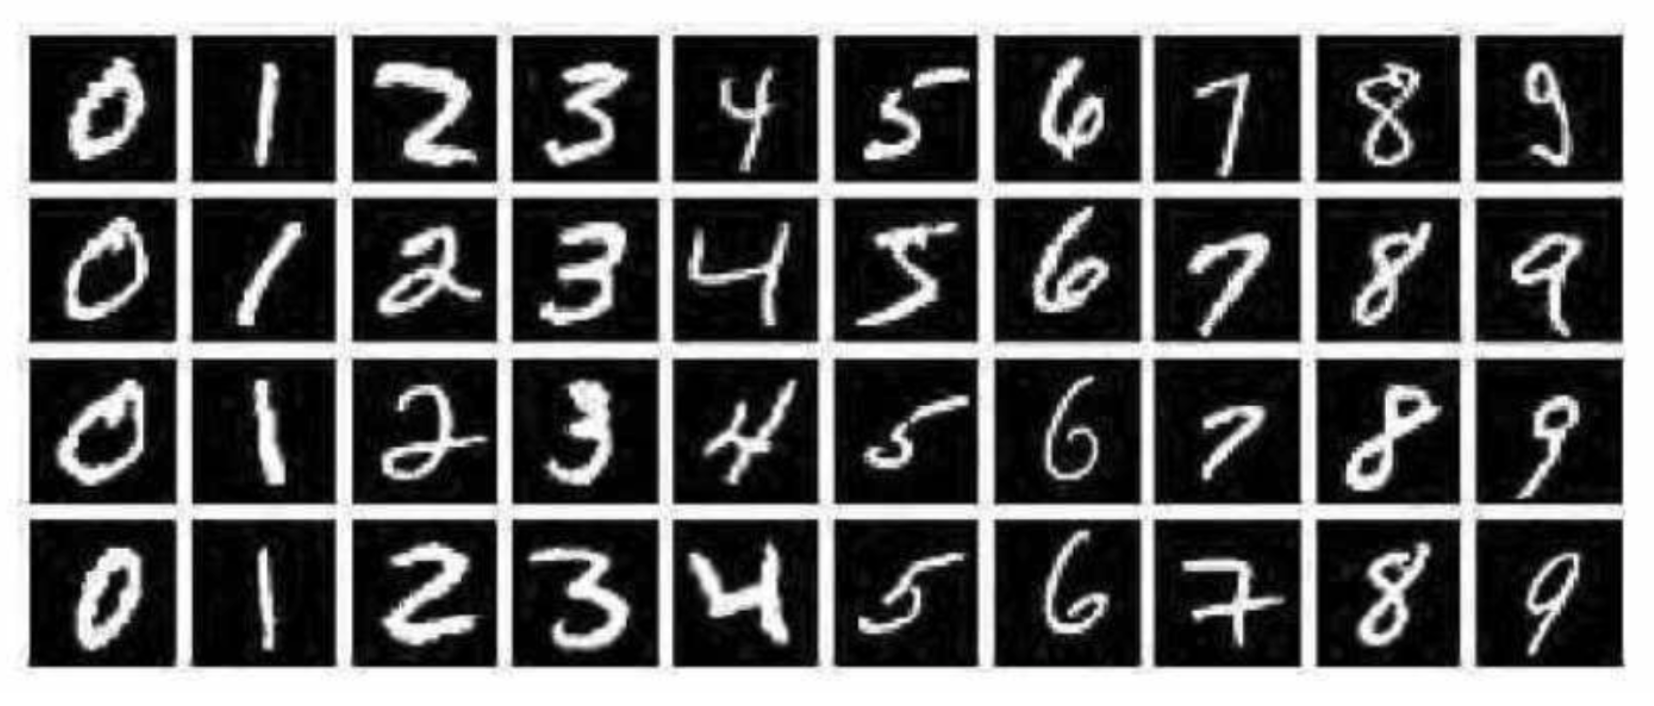

In [ ]:
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt

# 使用 TensorFlow 2.x 的 Keras 接口加载 MNIST 数据集
# Load the MNIST dataset using TensorFlow 2.x's Keras API
mnist = tf.keras.datasets.mnist

# 使用 Keras 的接口加载 MNIST 数据集
# Load the MNIST dataset using Keras API
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# 本地目录路径
# Local directory path
data_dir = './my_mnist_data/'
if not os.path.exists(data_dir):
    os.makedirs(data_dir)

# 将数据保存为 .npy 文件
# Save the data as .npy files
np.save(os.path.join(data_dir, 'x_train.npy'), x_train)
np.save(os.path.join(data_dir, 'y_train.npy'), y_train)
np.save(os.path.join(data_dir, 'x_test.npy'), x_test)
np.save(os.path.join(data_dir, 'y_test.npy'), y_test)

# 打印提示信息
# Print a message
print("MNIST dataset has been saved to the local directory!")

In [1]:
import numpy as np
import os

# 本地目录路径
# Local directory path
data_dir = './my_mnist_data/'

# 从本地加载数据
# Load data from the local directory
x_train = np.load(os.path.join(data_dir, 'x_train.npy'))
y_train = np.load(os.path.join(data_dir, 'y_train.npy'))
x_test = np.load(os.path.join(data_dir, 'x_test.npy'))
y_test = np.load(os.path.join(data_dir, 'y_test.npy'))

# 打印数据信息
# Print data information
print("MNIST dataset has been loaded from the local directory!")
print("Number of training samples:", x_train.shape[0])
print("Number of test samples:", x_test.shape[0])

MNIST dataset has been loaded from the local directory!
Number of training samples: 60000
Number of test samples: 10000


In [3]:
import tensorflow as tf

# 查看训练集和测试集的基本信息
# Check basic information about the training and test sets
print("Type of training images: ", type(x_train))
print("Type of training labels: ", type(y_train))

print("\nShape of training images: ", x_train.shape)
print("Shape of training labels: ", y_train.shape)
print("Shape of test images: ", x_test.shape)
print("Shape of test labels: ", y_test.shape)

# 查看数据的最小值和最大值
# Check the minimum and maximum values in the dataset
print("\nMinimum value in training images: ", x_train.min())
print("Maximum value in training images: ", x_train.max())
print("Minimum value in training label: ", y_train.min())
print("Maximum value in training label: ", y_train.max())

Type of training images:  <class 'numpy.ndarray'>
Type of training labels:  <class 'numpy.ndarray'>

Shape of training images:  (60000, 28, 28)
Shape of training labels:  (60000,)
Shape of test images:  (10000, 28, 28)
Shape of test labels:  (10000,)

Minimum value in training images:  0
Maximum value in training images:  255
Minimum value in training label:  0
Maximum value in training label:  9


38820th training data => label: 6


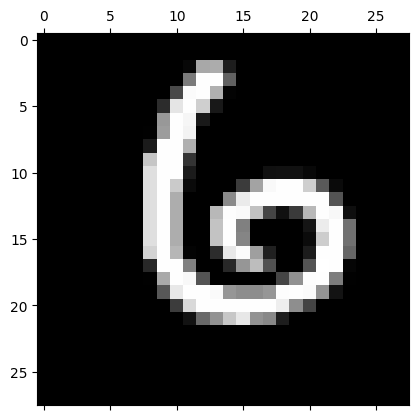

In [6]:
# 查看其中一张图片的具体数据
# Display data of one image from the training set
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# 随机选择要展示的样本索引
# Randomly select an index of a sample to display
randidx = np.random.randint(0, x_train.shape[0])

# 获取当前图像和标签
# Get the current image and label
curr_img = x_train[randidx]
curr_label = y_train[randidx]

# 显示图像
# Display the image
plt.matshow(curr_img, cmap='gray')

# 打印标签信息
# Print label information
print(f"{randidx}th training data => label: {curr_label}")

# 展示图片
# Show the image
plt.show()

## 神经网络识别 Neural networks for recognition

### 一层隐藏层 One hidden layer

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 876us/step - accuracy: 0.8518 - loss: 0.5191
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9554 - loss: 0.1532
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 933us/step - accuracy: 0.9686 - loss: 0.1070
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 882us/step - accuracy: 0.9745 - loss: 0.0822
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 994us/step - accuracy: 0.9794 - loss: 0.0694
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 893us/step - accuracy: 0.9837 - loss: 0.0542
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 878us/step - accuracy: 0.9866 - loss: 0.0472
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 885us/step - accuracy: 0.9883 - loss: 0.0387
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 854us/step - accuracy: 0.9897 - loss: 0.0328
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 875us/step - accuracy: 0.9910 - loss: 0.0288
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step - accuracy: 0.9690 - loss: 0.1141
Test accuracy: 97.33%
31

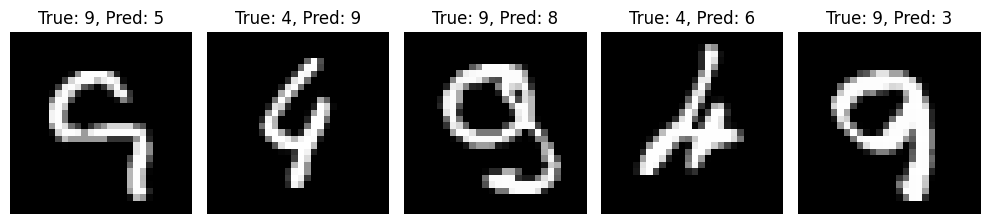

In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# 1. 数据预处理：将图像展平为784维向量，并将像素值归一化到[0, 1]
# 1. Data Preprocessing: Flatten the images into 784-dimensional vectors 
#    and normalize the pixel values to the range [0, 1].
x_train_p = x_train.reshape(-1, 28*28).astype('float32') / 255.0
x_test_p = x_test.reshape(-1, 28*28).astype('float32') / 255.0

# 2. 构建简单的神经网络模型
# 2. Build a simple neural network model
model = models.Sequential([
    # 输入层，28x28像素展平为784个输入
    # Input layer: 28x28 pixels flattened into 784 inputs
    layers.InputLayer(input_shape=(28*28,)),  
    # 隐藏层，64个神经元，激活函数为ReLU
    # Hidden layer: 64 neurons, ReLU activation
    layers.Dense(64, activation='relu'),    
    # 输出层，10个类别，使用Softmax激活
    # Output layer: 10 classes, Softmax activation
    layers.Dense(10, activation='softmax')    
])

# 3. 编译模型，指定损失函数、优化器和评估指标
# 3. Compile the model, specifying the loss function, optimizer, and evaluation metrics
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 4. 训练模型
# 4. Train the model
model.fit(x_train_p, y_train, epochs=10, batch_size=32)

# 5. 在测试集上评估模型
# 5. Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test_p, y_test)
print(f"Test accuracy: {test_acc*100:.2f}%")

# 6. 将预测结果转换为类别索引
# 6. Convert prediction results to class indices
predictions = model.predict(x_test_p)
predicted_labels = np.argmax(predictions, axis=1)

# 7. 找到预测错误的样本
# 7. Find the misclassified samples
incorrect_indices = np.where(predicted_labels != y_test)[0]

# 打印预测错误样本的数量
# Print the number of misclassified samples
print(f"Found {len(incorrect_indices)}/{len(y_test)} misclassified samples.")

# 8. 可视化前几个预测错误的样本
# 8. Visualize the first few misclassified samples
num_to_display = 5  # 要展示的错误样本数量
# Number of misclassified samples to display

plt.figure(figsize=(10, 5))

for i, idx in enumerate(incorrect_indices[:num_to_display]):
    plt.subplot(1, num_to_display, i + 1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[idx]}, Pred: {predicted_labels[idx]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

### 多层隐藏层 Multiple hidden layers

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8539 - loss: 0.4856
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 991us/step - accuracy: 0.9608 - loss: 0.1271
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9722 - loss: 0.0870
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 984us/step - accuracy: 0.9778 - loss: 0.0697
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 983us/step - accuracy: 0.9823 - loss: 0.0558
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 990us/step - accuracy: 0.9833 - loss: 0.0512
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9873 - loss: 0.0395
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9881 - loss: 0.0348
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 999us/step - accuracy: 0.9899 - loss: 0.0305
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9894 - loss: 0.0302
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - accuracy: 0.9706 - loss: 0.1235
Test accuracy: 97.40%
313/313 ━━

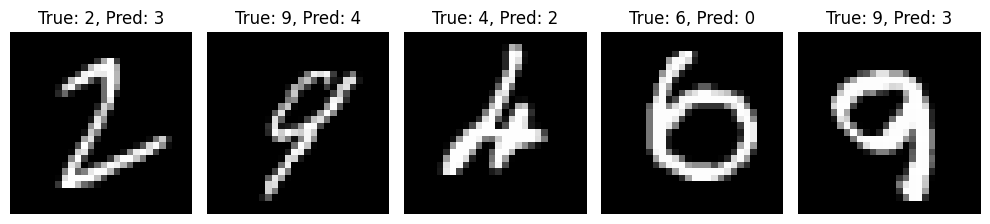

In [17]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# 1. 数据预处理：将图像展平为784维向量，并将像素值归一化到[0, 1]
# 1. Data Preprocessing: Flatten the images into 784-dimensional vectors 
#    and normalize the pixel values to the range [0, 1].
x_train_p = x_train.reshape(-1, 28*28).astype('float32') / 255.0
x_test_p = x_test.reshape(-1, 28*28).astype('float32') / 255.0

# 2. 构建简单的神经网络模型
# 2. Build a simple neural network model
model = models.Sequential([
    # 输入层，28x28像素展平为784个输入
    # Input layer: 28x28 pixels flattened into 784 inputs
    layers.InputLayer(input_shape=(28*28,)),  
    # 多层隐藏层，64个神经元，激活函数为ReLU
    # Multiple hidden layer2: 64 neurons, ReLU activation
    layers.Dense(64, activation='relu'),    
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),  
    # 输出层，10个类别，使用Softmax激活
    # Output layer: 10 classes, Softmax activation
    layers.Dense(10, activation='softmax')    
])

# 3. 编译模型，指定损失函数、优化器和评估指标
# 3. Compile the model, specifying the loss function, optimizer, and evaluation metrics
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 4. 训练模型
# 4. Train the model
model.fit(x_train_p, y_train, epochs=10, batch_size=32)

# 5. 在测试集上评估模型
# 5. Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test_p, y_test)
print(f"Test accuracy: {test_acc*100:.2f}%")

# 6. 将预测结果转换为类别索引
# 6. Convert prediction results to class indices
predictions = model.predict(x_test_p)
predicted_labels = np.argmax(predictions, axis=1)

# 7. 找到预测错误的样本
# 7. Find the misclassified samples
incorrect_indices = np.where(predicted_labels != y_test)[0]

# 打印预测错误样本的数量
# Print the number of misclassified samples
print(f"Found {len(incorrect_indices)}/{len(y_test)} misclassified samples.")

# 8. 可视化前几个预测错误的样本
# 8. Visualize the first few misclassified samples
num_to_display = 5  # 要展示的错误样本数量
# Number of misclassified samples to display

plt.figure(figsize=(10, 5))

for i, idx in enumerate(incorrect_indices[:num_to_display]):
    plt.subplot(1, num_to_display, i + 1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[idx]}, Pred: {predicted_labels[idx]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

## 卷积神经网络识别 Convolutional neural networks for recognition

### 一层卷积层 One convolutional layer

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9016 - loss: 0.3436
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9831 - loss: 0.0573
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9875 - loss: 0.0396
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9914 - loss: 0.0279
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9943 - loss: 0.0189
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9954 - loss: 0.0156
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9968 - loss: 0.0111
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9975 - loss: 0.0072
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9981 - loss: 0.0060
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9979 - loss: 0.0063
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9809 - loss: 0.0721
Test accuracy: 98.51%
313/31

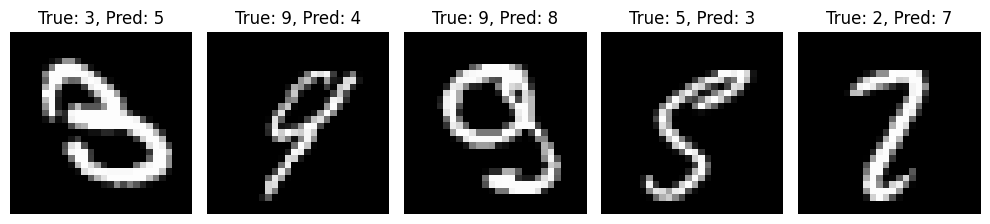

In [19]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# 1. 将输入数据的形状调整为 (28, 28, 1) 以匹配CNN输入
# 1. Reshape input data to (28, 28, 1) to match the CNN input
x_train_cnn = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test_cnn = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# 2. 构建卷积的神经网络模型
# 2. Build a simple convolutional neural network model
model = models.Sequential([
    # 第一层卷积层，32个3x3滤波器，激活函数为ReLU
    # First convolutional layer: 32 filters of size 3x3, activation function is ReLU
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    # 最大池化层
    # Max pooling layer
    layers.MaxPooling2D((2, 2)),  
    # 展平层
    # Flatten layer
    layers.Flatten(),
    # 全连接层，64个神经元
    # Fully connected layer: 64 neurons
    layers.Dense(64, activation='relu'),
    # 输出层，10个类别
    # Output layer: 10 classes
    layers.Dense(10, activation='softmax')
])

# 3. 编译模型，指定损失函数、优化器和评估指标
# 3. Compile the model, specifying the loss function, optimizer, and evaluation metrics
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 4. 训练模型
# 4. Train the model
model.fit(x_train_cnn, y_train, epochs=10, batch_size=32)

# 5. 在测试集上评估模型
# 5. Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test_cnn, y_test)
print(f"Test accuracy: {test_acc*100:.2f}%")

# 6. 将预测结果转换为类别索引
# 6. Convert prediction results to class indices
predictions = model.predict(x_test_cnn)
predicted_labels = np.argmax(predictions, axis=1)

# 7. 找到预测错误的样本
# 7. Find the misclassified samples
incorrect_indices = np.where(predicted_labels != y_test)[0]

# 打印预测错误样本的数量
# Print the number of misclassified samples
print(f"Found {len(incorrect_indices)}/{len(y_test)} misclassified samples.")

# 8. 可视化前几个预测错误的样本
# 8. Visualize the first few misclassified samples
num_to_display = 5  # 要展示的错误样本数量
# Number of misclassified samples to display

plt.figure(figsize=(10, 5))

for i, idx in enumerate(incorrect_indices[:num_to_display]):
    plt.subplot(1, num_to_display, i + 1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[idx]}, Pred: {predicted_labels[idx]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

### 多层卷积层 Multiple convolutional layer

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9044 - loss: 0.3163
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9853 - loss: 0.0491
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9908 - loss: 0.0308
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9928 - loss: 0.0227
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9947 - loss: 0.0174
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9958 - loss: 0.0127
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9977 - loss: 0.0082
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9974 - loss: 0.0085
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9974 - loss: 0.0086
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9972 - loss: 0.0081
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9893 - loss: 0.0417
Test accuracy: 99.16%
31

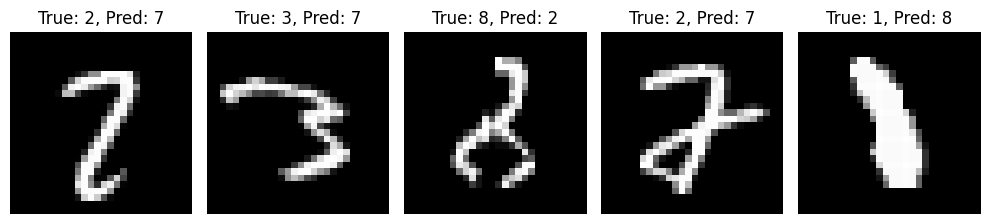

In [20]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# 1. 将输入数据的形状调整为 (28, 28, 1) 以匹配CNN输入
# 1. Reshape input data to (28, 28, 1) to match the CNN input
x_train_cnn = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test_cnn = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# 2. 构建卷积的神经网络模型
# 2. Build a simple convolutional neural network model
model = models.Sequential([
    # 第一层卷积层，32个3x3滤波器，激活函数为ReLU
    # First convolutional layer: 32 filters of size 3x3, activation function is ReLU
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    # 最大池化层
    # Max pooling layer
    layers.MaxPooling2D((2, 2)),  
    # 第二层卷积层，64个3x3滤波器
    # Second convolutional layer: 64 filters of size 3x3
    layers.Conv2D(64, (3, 3), activation='relu'),
    # 最大池化层
    # Max pooling layer
    layers.MaxPooling2D((2, 2)),
    # 展平层
    # Flatten layer
    layers.Flatten(),
    # 全连接层，64个神经元
    # Fully connected layer: 64 neurons
    layers.Dense(64, activation='relu'),
    # 输出层，10个类别
    # Output layer: 10 classes
    layers.Dense(10, activation='softmax')
])

# 3. 编译模型，指定损失函数、优化器和评估指标
# 3. Compile the model, specifying the loss function, optimizer, and evaluation metrics
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 4. 训练模型
# 4. Train the model
model.fit(x_train_cnn, y_train, epochs=10, batch_size=32)

# 5. 在测试集上评估模型
# 5. Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test_cnn, y_test)
print(f"Test accuracy: {test_acc*100:.2f}%")

# 6. 将预测结果转换为类别索引
# 6. Convert prediction results to class indices
predictions = model.predict(x_test_cnn)
predicted_labels = np.argmax(predictions, axis=1)

# 7. 找到预测错误的样本
# 7. Find the misclassified samples
incorrect_indices = np.where(predicted_labels != y_test)[0]

# 打印预测错误样本的数量
# Print the number of misclassified samples
print(f"Found {len(incorrect_indices)}/{len(y_test)} misclassified samples.")

# 8. 可视化前几个预测错误的样本
# 8. Visualize the first few misclassified samples
num_to_display = 5  # 要展示的错误样本数量
# Number of misclassified samples to display

plt.figure(figsize=(10, 5))

for i, idx in enumerate(incorrect_indices[:num_to_display]):
    plt.subplot(1, num_to_display, i + 1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[idx]}, Pred: {predicted_labels[idx]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

### 深层卷积神经网络与残差网络 Deep Convolutional Neural Networks and Residual Networks

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 33ms/step - accuracy: 0.8912 - loss: 0.3268
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 34ms/step - accuracy: 0.9863 - loss: 0.0450
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 31ms/step - accuracy: 0.9905 - loss: 0.0326
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.9920 - loss: 0.0268
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 30ms/step - accuracy: 0.9936 - loss: 0.0197
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 32ms/step - accuracy: 0.9938 - loss: 0.0192
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.9955 - loss: 0.0154
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 33ms/step - accuracy: 0.9948 - loss: 0.0181
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 32ms/step - accuracy: 0.9957 - loss: 0.0137
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 32ms/step - accuracy: 0.9957 - loss: 0.0138
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9888 - loss: 0.0398
Test accuracy: 99.16%
3

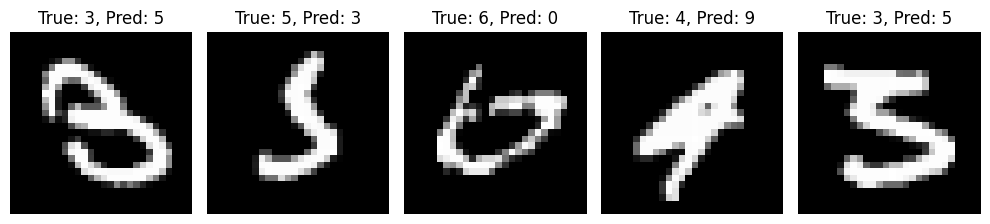

In [22]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# 1. 将输入数据的形状调整为 (28, 28, 1) 以匹配CNN输入
# 1. Reshape input data to (28, 28, 1) to match the CNN input
x_train_cnn = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test_cnn = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# 定义残差块
# Define a Residual Block
def residual_block(x, filters, kernel_size=(3, 3)):
    # 保存输入以便后面进行跳跃连接
    # Save the input for the skip connection
    shortcut = x
    # 第一层卷积
    # First convolution layer
    x = layers.Conv2D(filters, kernel_size, padding='same', activation='relu')(x)
    # 第二层卷积
    # Second convolution layer
    x = layers.Conv2D(filters, kernel_size, padding='same')(x)
    # 跳跃连接：将输入与卷积层输出相加
    # Skip connection: Add input (shortcut) to output of convolution layers
    x = layers.Add()([x, shortcut])
    # 激活函数 ReLU
    # Activation function ReLU
    x = layers.Activation('relu')(x)
    return x

# 2. 使用Functional API构建模型
# 2. Build the model using Functional API
# 输入层
# Input layer
inputs = layers.Input(shape=(28, 28, 1))
# 第一层卷积层和池化层
# First convolutional layer and pooling layer
x = layers.Conv2D(32, (3, 3), activation='relu')(inputs)
x = layers.MaxPooling2D((2, 2))(x)
# 添加第一个残差块
# Add first residual block
x = residual_block(x, 32)
# 第二层卷积层和池化层
# Second convolutional layer and pooling layer
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
# 添加第二个残差块
# Add second residual block
x = residual_block(x, 64)
# 第三层卷积层和池化层
# Third convolutional layer and pooling layer
x = layers.Conv2D(128, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
# 展平层
# Flatten layer
x = layers.Flatten()(x)
# 全连接层
# Fully connected layer
x = layers.Dense(128, activation='relu')(x)
# 输出层
# Output layer
outputs = layers.Dense(10, activation='softmax')(x)
# 构建模型
# Build the model
model = models.Model(inputs=inputs, outputs=outputs)

# 3. 编译模型，指定损失函数、优化器和评估指标
# 3. Compile the model, specifying the loss function, optimizer, and evaluation metrics
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 4. 训练模型
# 4. Train the model
model.fit(x_train_cnn, y_train, epochs=10, batch_size=32)

# 5. 在测试集上评估模型
# 5. Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test_cnn, y_test)
print(f"Test accuracy: {test_acc*100:.2f}%")

# 6. 将预测结果转换为类别索引
# 6. Convert prediction results to class indices
predictions = model.predict(x_test_cnn)
predicted_labels = np.argmax(predictions, axis=1)

# 7. 找到预测错误的样本
# 7. Find the misclassified samples
incorrect_indices = np.where(predicted_labels != y_test)[0]

# 打印预测错误样本的数量
# Print the number of misclassified samples
print(f"Found {len(incorrect_indices)}/{len(y_test)} misclassified samples.")

# 8. 可视化前几个预测错误的样本
# 8. Visualize the first few misclassified samples
num_to_display = 5  # 要展示的错误样本数量
# Number of misclassified samples to display

plt.figure(figsize=(10, 5))

for i, idx in enumerate(incorrect_indices[:num_to_display]):
    plt.subplot(1, num_to_display, i + 1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[idx]}, Pred: {predicted_labels[idx]}")
    plt.axis('off')

plt.tight_layout()
plt.show()